In [1]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Analysis and Data Preprocessing

In [2]:
# Load the data
ipl_data = pd.read_csv("ipl_data.csv")

In [3]:
# First 5 rows
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.4,2.0,0.0,0.0,0.0,222.0


In [4]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84405 entries, 0 to 84404
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             84405 non-null  int64  
 1   date            84405 non-null  object 
 2   venue           84405 non-null  object 
 3   bat_team        84405 non-null  object 
 4   bowl_team       84405 non-null  object 
 5   batsman         84405 non-null  object 
 6   bowler          84405 non-null  object 
 7   runs            84405 non-null  int64  
 8   wickets         84405 non-null  float64
 9   overs           84404 non-null  float64
 10  runs_last_5     84404 non-null  float64
 11  wickets_last_5  84404 non-null  float64
 12  striker         84404 non-null  float64
 13  non-striker     84404 non-null  float64
 14  total           84403 non-null  float64
dtypes: float64(7), int64(2), object(6)
memory usage: 9.7+ MB


From the above output, it becomes pretty clear that we have around 76014 non-null entries 
and a total of 14 variables/features in our dataset.

Next steps in our data analysis and preprocessing involves finding out the relationships/dependencies amongst variables, removing unnecessary columns, encoding the categorical columns etc.

## Data Preprocessing

In [5]:
# Check the shape of data 
rows = ipl_data.shape[0]
columns =ipl_data.shape[1]

print("The number of rows in the data is -> %d"%(rows))
print("The number of columns in the data is -> %d"%(columns))

The number of rows in the data is -> 84405
The number of columns in the data is -> 15


In [6]:
# Check for Null Values
ipl_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             1
runs_last_5       1
wickets_last_5    1
striker           1
non-striker       1
total             2
dtype: int64

In [7]:
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.4,2.0,0.0,0.0,0.0,222.0


In [8]:
ipl_data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.4,2.0,0.0,0.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84400,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7.0,19.2,40.0,0.0,40.0,12.0,129.0
84401,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7.0,19.3,46.0,0.0,46.0,12.0,129.0
84402,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7.0,19.4,47.0,0.0,47.0,12.0,129.0
84403,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7.0,19.5,48.0,0.0,47.0,13.0,129.0


In [9]:
# Drop the unnecessary columns like mid, striker and non striker
columns_to_drop = ['mid','striker','non-striker']
ipl_data.drop(columns_to_drop, axis = 1, inplace =True)

In [10]:
ipl_data.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.4,2.0,0.0,222.0


In [11]:
# Print all the teams
print(np.unique(ipl_data['bat_team']))

['Chennai Super Kings' 'Chennai Supethan Royals' 'Deccan Chargers'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


Those who are cricketing fans and followers of the IPL must be aware of that fact that some of the teams shown in above output have either completely dropped out or have changed their names. So, in the next step I will drop those teams who are not associated with the IPL anymore and consider only the current teams. For example, the Gujarat Lions do not play anymore, hence, all the data points associated with it will be dropped.

In [12]:
# We don't want team which are not playing right now
all_teams = np.unique(ipl_data['bat_team'])
old_teams = ['Deccan Chargers', 'Kochi Tuskers Kerala', 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Rising Pune Supergiant', 'Pune Warriors', 'Rising Pune Supergiants']
current_teams = [teams for teams in all_teams if teams not in old_teams] 

# Use the rows which have current_teams
ipl_data = ipl_data[ipl_data['bat_team'].isin(current_teams) & ipl_data['bowl_team'].isin(current_teams)]

In [13]:
ipl_data

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0.0,0.4,2.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84275,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,UT Yadav,SL Malinga,106,9.0,18.1,29.0,4.0,107.0
84276,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,UT Yadav,SL Malinga,107,9.0,18.2,29.0,4.0,107.0
84277,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,AS Rajpoot,SL Malinga,107,9.0,18.3,28.0,4.0,107.0
84278,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,AS Rajpoot,SL Malinga,107,9.0,18.4,24.0,4.0,107.0


Having removed the old teams, we examine the correlation between the variables. Correlation is a statistical term describing the degree to which two variables move in coordination with one another. This can be done in Python using the pandas.DataFrame.corr() function.

In [14]:
# Check the correlation between the numerical features
corr = ipl_data.corr()

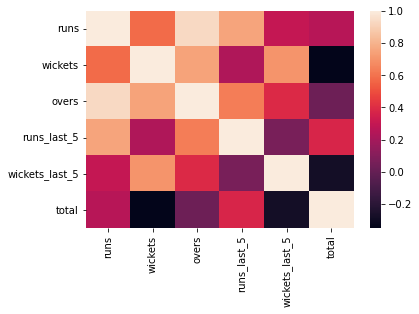

In [15]:
# plot the heatmaps using seaborn
import seaborn as sns 
sns.heatmap(corr)

There seems to be high correlation between runs and overs and runs and runs_last_5. This makes sense as well as the number of over increase the runs seem to increase as well.

In [16]:
corr

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.579509,0.936400,0.756911,0.301059,0.260959
wickets,0.579509,1.000000,0.750014,0.234503,0.701305,-0.350283
overs,0.936400,0.750014,1.000000,0.633654,0.388171,0.025991
runs_last_5,0.756911,0.234503,0.633654,1.000000,0.062499,0.377144
wickets_last_5,0.301059,0.701305,0.388171,0.062499,1.000000,-0.280499
total,0.260959,-0.350283,0.025991,0.377144,-0.280499,1.000000


 ##### We observe multicolinearity here

Next steps, in the data preprocessing involves the encoding of the categorical variables. So, the categorical variables can be of two types: Ordinal and Nominal. Ordinal categorical variables include those which have an underlying order. For example, Good, Better, Best or High, Medium, Low. The other type is the Nominal categorical variables which do not have any underlying order. For example, Gender.

I will use sklearn’s LabelEncoder for ordinal variables and pandas get_dummies() for the nominal variables. 

In [17]:
# Encode the categorical columns using pd.get_dummies
cat_cols = ['venue', 'bat_team', 'bowl_team', 'batsman','bowler']

# Let's check the number of unique values in cat_cols
for cols in cat_cols:
    n_unique = np.unique(ipl_data[cols]).shape[0]
    print("Number of unique values in %s column is -> %d"%(cols, n_unique))

Number of unique values in venue column is -> 31
Number of unique values in bat_team column is -> 8
Number of unique values in bowl_team column is -> 8
Number of unique values in batsman column is -> 349
Number of unique values in bowler column is -> 275


In [18]:
# As expected 'batsman' and 'bowler' columns are having high cardinality. Hence, we will use label encoder for batsman and bowler column
from sklearn.preprocessing import LabelEncoder

le_columns = ['batsman', 'bowler', 'venue']
le = LabelEncoder() # Label Encoder object

for col in le_columns:
    ipl_data[col] = le.fit_transform(ipl_data[col]) #Label Encode the data

In [19]:
ipl_data

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,276,168,1,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,1,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0.0,0.4,2.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84275,2017-05-19,13,Kolkata Knight Riders,Mumbai Indians,324,230,106,9.0,18.1,29.0,4.0,107.0
84276,2017-05-19,13,Kolkata Knight Riders,Mumbai Indians,324,230,107,9.0,18.2,29.0,4.0,107.0
84277,2017-05-19,13,Kolkata Knight Riders,Mumbai Indians,36,230,107,9.0,18.3,28.0,4.0,107.0
84278,2017-05-19,13,Kolkata Knight Riders,Mumbai Indians,36,230,107,9.0,18.4,24.0,4.0,107.0


In [20]:
nominal_cols = ['bat_team', 'bowl_team'] # one hot encode these columns

# One hot encode the columns and concat using pd.concat
ipl_data = pd.concat((ipl_data, pd.get_dummies(ipl_data[nominal_cols])), axis = 1)

In [21]:
ipl_data.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,276,168,1,0.0,0.1,1.0,...,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,1,0.0,0.2,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0.0,0.2,2.0,...,0,0,0,0,0,0,0,0,1,0
3,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0.0,0.3,2.0,...,0,0,0,0,0,0,0,0,1,0
4,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0.0,0.4,2.0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Since, the nominal columns have been encoded now we don't have any use for those so, drop these columns
ipl_data.drop(nominal_cols, axis = 1, inplace = True)

In [23]:
# Convert 
ipl_data['date'] = pd.to_datetime(ipl_data['date'])

In [24]:
ipl_data['date'].dt.year

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
84275    2017
84276    2017
84277    2017
84278    2017
84279    2017
Name: date, Length: 58623, dtype: int64

In [25]:
# Split the data into training and testing set
train_set = ipl_data[ipl_data['date'].dt.year <= 2015]
test_set = ipl_data[ipl_data['date'].dt.year > 2015]

print('Shape of training set is -> %d, %d'%(train_set.shape[0], train_set.shape[1]))
print('Shape of testing set is -> %d, %d'%(test_set.shape[0], test_set.shape[1]))

Shape of training set is -> 51079, 26
Shape of testing set is -> 7544, 26


In [26]:
# Drop the date columns
train_set.drop(['date'], axis = 1, inplace = True)
test_set.drop(['date'], axis = 1, inplace = True)

Next step involves, bringing all the variables to the same scale, this is known as feature scaling. So, this step is very important if you are going to build a Linear Regression model or a KNN model, feature scaling can help improve the performance of these models. I will be using sklearn’s StandardScaler class to scale the variables. It brings down the mean of all the variables to 0 and to a standard deviation of 1.

In [27]:
# Performing the standardization on the train and test set
from sklearn.preprocessing import StandardScaler

# Fit the standard scaler
for column in train_set.columns:
  
  if column != 'total':
  # Standard Scaler object
    ss = StandardScaler()
    # Fit every column
    train_set[column] = ss.fit_transform(train_set[column].values.reshape((-1,1)))
'''(X-X.mean())/X.std()'''

# Similarly, scale the test set
for column in test_set.columns:
    if column != 'total':
        # Standard Scaler object
        ss = StandardScaler()
        # Fit every column
        test_set[column] = ss.fit_transform(test_set[column].values.reshape((-1,1)))

In [28]:
train_set.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,-0.361599,1.023880,0.319997,-1.502165,-1.188078,-1.672794,-2.140204,-1.047213,222.0,-0.440889,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079
1,-0.361599,-1.308026,0.319997,-1.502165,-1.188078,-1.655478,-2.140204,-1.047213,222.0,-0.440889,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079
2,-0.361599,-1.308026,0.319997,-1.481834,-1.188078,-1.655478,-2.073948,-1.047213,222.0,-0.440889,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079
3,-0.361599,-1.308026,0.319997,-1.481834,-1.188078,-1.638162,-2.073948,-1.047213,222.0,-0.440889,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079
4,-0.361599,-1.308026,0.319997,-1.481834,-1.188078,-1.620846,-2.073948,-1.047213,222.0,-0.440889,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079


In [29]:
test_set.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
70457,-1.053301,-0.133250,-1.547011,-1.455887,-1.158339,-1.684851,-2.018342,-1.069311,98.0,0.0,...,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
70458,-1.053301,-0.133250,-1.547011,-1.455887,-1.158339,-1.667531,-2.018342,-1.069311,98.0,0.0,...,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
70459,-1.053301,-0.133250,-1.547011,-1.436325,-1.158339,-1.667531,-1.952746,-1.069311,98.0,0.0,...,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
70460,-1.053301,-0.133250,-1.547011,-1.416762,-1.158339,-1.650212,-1.887150,-1.069311,98.0,0.0,...,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
70461,-1.053301,0.399457,-1.547011,-1.416762,-1.158339,-1.632892,-1.887150,-1.069311,98.0,0.0,...,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815


In [30]:
# Split the training and testing set into X and y
X_train, y_train = train_set.drop('total', axis = 1), train_set['total']
X_test, y_test = test_set.drop('total', axis = 1), test_set['total']

In [31]:
X_train.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,-0.361599,1.023880,0.319997,-1.502165,-1.188078,-1.672794,-2.140204,-1.047213,-0.440889,-0.340363,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079
1,-0.361599,-1.308026,0.319997,-1.502165,-1.188078,-1.655478,-2.140204,-1.047213,-0.440889,-0.340363,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079
2,-0.361599,-1.308026,0.319997,-1.481834,-1.188078,-1.655478,-2.073948,-1.047213,-0.440889,-0.340363,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079
3,-0.361599,-1.308026,0.319997,-1.481834,-1.188078,-1.638162,-2.073948,-1.047213,-0.440889,-0.340363,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079
4,-0.361599,-1.308026,0.319997,-1.481834,-1.188078,-1.620846,-2.073948,-1.047213,-0.440889,-0.340363,...,-0.368642,-0.24913,-0.385844,-0.418087,-0.36338,-0.399559,-0.396424,-0.399362,2.33404,-0.201079


## Machine Learning Modelling

I have chosen the following models in the given order.

1. KNN Regressor

2. Linear Regression

3. Decision Tree Regressor

4. RandomForest Regressor

5. XGBoost Regressor

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

# Compute the metrics and return the results
def Compute_Metrics(y_true, y_pred):
     
    #1. MAE
    mae = mean_absolute_error(y_true, y_pred)
    #2. MSE
    mse = mean_squared_error(y_true, y_pred)
    #3. RMSE
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    
    try:
    #5. MSLE
        msle = mean_squared_log_error(y_true, y_pred)
        metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [msle]}
    except:
        metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [0]}
        
    # Create a DataFrame and storing all the metrics
    metrics_df = pd.DataFrame(data=metrics_dict) # Creating the DataFrame
    
    return  metrics_df # formatting the DataFrame to return results only upto 4 decimal places

In [33]:
#1. K-Nearest Neighbours

from sklearn.neighbors import KNeighborsRegressor

# model object
knn = KNeighborsRegressor()

# Model Parameters
n_neighbors = list(np.arange(2, 100, 2))
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Create a parameters dictionary
params = {'n_neighbors' : n_neighbors,
          'weights' : weights,
          'algorithm' : algorithm
         }

# RSCV object
rscv_knn = RandomizedSearchCV(knn, params, n_iter = 2, n_jobs = -1, cv=5, refit = True, scoring = 'neg_mean_squared_error', random_state = 42)

# Fit the model
rscv_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=2, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 4, 6, 8, 10, 12, 14,
                                                        16, 18, 20, 22, 24, 26,
                                                        28, 30, 32, 34, 36, 38,
                                                        40, 42, 44, 46, 48, 50,
                                                        52, 54, 56, 58, 60, ...],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_squared_error')

In [34]:
# Let us check the best parameter
rscv_knn.best_estimator_

KNeighborsRegressor(algorithm='brute', n_neighbors=56)

In [35]:
# Make predictions on the test set and compute all the metrics
knn_pred = rscv_knn.predict(X_test)

# Compute metrics
knn_metrics = Compute_Metrics(y_test, knn_pred)

In [36]:
knn_metrics

,MAE,MSE,RMSE,MSLE
0,23.940248,889.5458,29.825254,0.036547


In [37]:
# 2. Linear Regression

'''Expected Outcome: Results will be poor because, the assumptions of Linear Regression (Predictors should be independent) is violated,
   because predictors or variables are showing co-linearity amongst themselves.'''

from sklearn.linear_model import LinearRegression

# Model Object
lr = LinearRegression() # No need for RandomizedSearchCV because Linear Regression requires almost no Hyperparameter Tuning

# Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
# testing the model
lr_pred = lr.predict(X_test)

# Compute metrics
lr_metrics = Compute_Metrics(y_test, lr_pred)

In [39]:
lr_metrics

,MAE,MSE,RMSE,MSLE
0,6.659927e+13,7.334676e+27,8.564273e+13,0


#### As expected the results are extremely poor.

In [40]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Model Object
dt_reg = DecisionTreeRegressor()

In [41]:
# Hyperparameter Tuning
criterion = ["mse", "friedman_mse", "mae", "poisson"]
splitter = ["best", "random"]
max_depth = list(np.arange(2,200,2))
min_samples_split = list(np.arange(1,100))
min_weight_fraction_leaf = list(np.linspace(0.0, 0.5))
max_features = ["auto", "sqrt", "log2"]
max_features.append(None)

In [42]:
# Set parameters
params = {'criterion':criterion,
          'splitter':splitter,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_weight_fraction_leaf':min_weight_fraction_leaf,
          'max_features':max_features
          }

In [43]:
# RSCV object
rscv_dt = RandomizedSearchCV(dt_reg, params, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)


In [44]:
# Fit the model
rscv_dt.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, 32, 34, 36, 38,
                                                      40, 42, 44, 46, 48, 50,
                                                      52, 54, 56, 58, 60, ...],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                     

In [45]:
# Check the best estimator
rscv_dt.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=54,
                      min_samples_split=19,
                      min_weight_fraction_leaf=0.02040816326530612,
                      splitter='random')

In [46]:
# Make Predictions
dt_pred = rscv_dt.predict(X_test)

# Compute metrics
dt_metrics = Compute_Metrics(y_test, dt_pred)

In [47]:
dt_metrics

,MAE,MSE,RMSE,MSLE
0,18.455108,575.99628,23.999923,0.025283


In [48]:
# 4. Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model Object
rf_reg = RandomForestRegressor()

In [49]:
# Hyperparamters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [50]:
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [51]:
# RandomizedSearchCv
rscv_rf = RandomizedSearchCV(rf_reg, params, n_iter=5, cv=5, verbose=1, random_state=42)


In [52]:
# Fit the model
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [53]:
# Best Estimator
rscv_rf.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)

In [54]:
# Make predictions and compute metrics
rf_pred = rscv_rf.predict(X_test)

# Compute metric df
rf_metrics = Compute_Metrics(y_test, rf_pred)

In [55]:
rf_metrics

,MAE,MSE,RMSE,MSLE
0,17.785504,518.797482,22.777126,0.022546


In [56]:
# 5. XG Boost
from xgboost import XGBRegressor

# Model object
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)

[11:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [57]:
# make predictions
xgb_pred = xgb_reg.predict(X_test)

# Compute metrics
xgb_metric = Compute_Metrics(y_test, xgb_pred)

In [58]:
np.round(xgb_pred)

array([155., 155., 155., ..., 118., 112., 111.], dtype=float32)

In [59]:
xgb_metric

,MAE,MSE,RMSE,MSLE
0,16.672344,468.408322,21.642743,0.020131


In [60]:
# Create a list of all the model metric dfs
metrics_df = pd.concat([knn_metrics, lr_metrics, dt_metrics, rf_metrics, xgb_metric])
metrics_df['Models'] = ['KNN', 'LR', 'DT', 'RF', 'XGB']
metrics_df.set_index('Models', inplace=True)

In [61]:
transposed_metric_df = metrics_df.transpose() # Transpose the dataframe

In [62]:
transposed_metric_df

Models,KNN,LR,DT,RF,XGB
MAE,23.940248,6.659927e+13,18.455108,17.785504,16.672344
MSE,889.545800,7.334676e+27,575.996280,518.797482,468.408322
RMSE,29.825254,8.564273e+13,23.999923,22.777126,21.642743
MSLE,0.036547,0.000000e+00,0.025283,0.022546,0.020131


In [63]:
metrics_df.style.format('{:.2f}') #Format the dataframe

,MAE,MSE,RMSE,MSLE
Models,,,,
KNN,23.94,889.55,29.83,0.04
LR,66599265155912.88,7334676417951777028105568256.00,85642725423422.72,0.00
DT,18.46,576.00,24.00,0.03
RF,17.79,518.80,22.78,0.02
XGB,16.67,468.41,21.64,0.02


In [64]:
metrics_df_ = metrics_df.drop('LR',axis=0)

In [65]:
# Plot the results on a grouped bar graph using plotly
from plotly import graph_objects as go

# Initialise the figure
fig = go.Figure(
            data=[
                  # 1. Plotting MAE
                  go.Bar(
                        name = 'MAE',
                        x=metrics_df_.index,
                        y=metrics_df_['MAE'],
                        offsetgroup=0
                  ),
                  # 2. Plotting MSE
                  go.Bar(
                        name = 'MSE',
                        x=metrics_df_.index,
                        y=metrics_df_['MSE'],
                        offsetgroup=1
                  ),
                  # 3. Plotting RMSE
                  go.Bar(
                        name = 'RMSE',
                        x=metrics_df_.index,
                        y=metrics_df_['RMSE'],
                        offsetgroup=2
                  ),
                  # 4. Plotting MSLE
                  go.Bar(
                        name = 'MSLE',
                        x=metrics_df_.index,
                        y=metrics_df_['MSLE'],
                        offsetgroup=3
                  )
            ],
            # Updating the layout
            layout=go.Layout(
                title='Metric Comparison of Various Models'
            )
)
fig.show()

### THANK YOU